In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [2]:
ckpts5 = [int(_) for _ in ["110", "220", "331", "441", "550"]]
ckpts10 = [int(_) for _ in ["220", "440", "660", "880", "1100"]]
ckpts20 = [int(_) for _ in ["220", "440", "660", "880", "1100", "1320", "1540", "1760", "1980", "2200"]]


In [3]:
test_accs_rand5 = []

for ckpt in ckpts5:
    name = "math_aug3_rand2646_total2646_epochs5"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand5.append(test_accs.mean())


test_accs_rand5 = np.array(test_accs_rand5)

0.03176
0.05052
0.07956
0.12392
0.14572


In [8]:
test_accs_dict5 = {}
for num in [0, 1, 2, 3, 4]:

    test_accs_ckpt = []

    for ckpt in ckpts5:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs5"
        test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
        test_accs_ckpt.append(test_accs.mean())

    test_accs_ckpt = np.array(test_accs_ckpt)
    test_accs_dict5[num] = test_accs_ckpt

In [4]:
test_accs_rand10 = []

for ckpt in ckpts10:
    name = "math_aug3_rand2646_total2646_epochs10"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand10.append(test_accs.mean())


test_accs_rand10 = np.array(test_accs_rand10)

0.04272
0.08028
0.11484
0.13392
0.1482


In [10]:
test_accs_dict10 = {}

for num in [0, 1, 2, 3, 4]:
    
        test_accs_ckpt = []
    
        for ckpt in ckpts10:
            name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
            test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
            test_accs_ckpt.append(test_accs.mean())
    
        test_accs_ckpt = np.array(test_accs_ckpt)
        test_accs_dict10[num] = test_accs_ckpt

In [5]:
test_accs_rand20 = []

for ckpt in ckpts20:
    name = "math_aug3_rand2646_total2646_epochs20"
    test_accs = (np.load("../ckpts/"+name+"/checkpoint-"+str(ckpt)+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    test_accs_rand20.append(test_accs.mean())


test_accs_rand20 = np.array(test_accs_rand20)

0.03856
0.06436
0.08876
0.10604
0.11772
0.13228
0.14232
0.1492
0.15552
0.16024


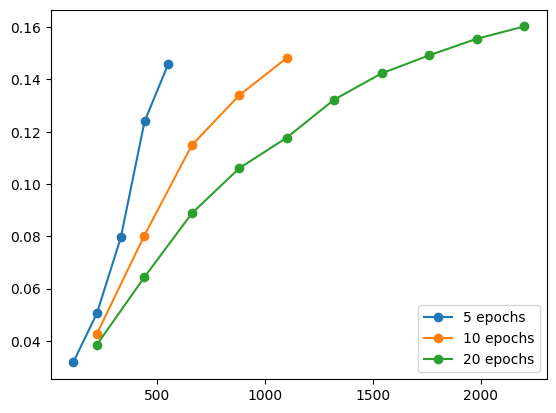

In [7]:
plt.plot(ckpts5, test_accs_rand5, label="5 epochs", marker="o")
plt.plot(ckpts10, test_accs_rand10, label="10 epochs", marker="o")
plt.plot(ckpts20, test_accs_rand20, label="20 epochs", marker="o")

plt.legend()

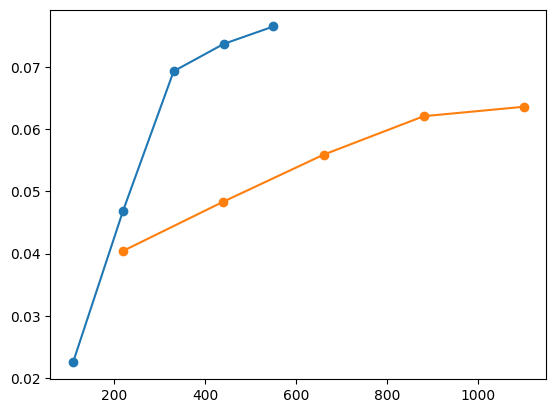

In [19]:
plt.plot(ckpts5, test_accs_dict5[0], label="5 epochs, eq 0", marker="o")
plt.plot(ckpts10, test_accs_dict10[0], label="5 epochs, eq 1", marker="o")

In [20]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [21]:
num_memorized_dict10 = {}
num_correct_different_dict10 = {}
num_incorrect_dict10 = {}
for num in range(5):
    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    ckpts = ["220", "440", "660", "880", "1100"]

    for ckpt in ckpts:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs10"
        subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
        # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
        train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
        train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

        num_memorized_ckpt = []
        num_correct_different_ckpt = []
        num_incorrect_ckpt = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_ckpt.append(num_memorized)
            num_correct_different_ckpt.append(num_correct_different)
            num_incorrect_ckpt.append(num_incorrect)
        
        num_memorized_all.append(num_memorized_ckpt)
        num_correct_different_all.append(num_correct_different_ckpt)
        num_incorrect_all.append(num_incorrect_ckpt)
        
    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)

    num_memorized_dict10[num] = num_memorized_all
    num_correct_different_dict10[num] = num_correct_different_all
    num_incorrect_dict10[num] = num_incorrect_all

In [22]:
num_memorized_dict5 = {}
num_correct_different_dict5 = {}
num_incorrect_dict5 = {}
for num in range(5):
    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []

    ckpts = ["110", "220", "331", "441", "550"]

    for ckpt in ckpts:
        name = f"math_aug3_unmemorized_eq_{num}_total2646_epochs5"
        subsample_idxs = np.load("../ckpts/"+name+"/subsample_idxs.npy")
        # name = "math_aug3_unmemorized_eq_0_total2646_epochs10"
        train_correct = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
        train_samples = (np.load("../ckpts/"+name+"/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

        num_memorized_ckpt = []
        num_correct_different_ckpt = []
        num_incorrect_ckpt = []

        for input_idx in range(len(train_correct)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_ckpt.append(num_memorized)
            num_correct_different_ckpt.append(num_correct_different)
            num_incorrect_ckpt.append(num_incorrect)
        
        num_memorized_all.append(num_memorized_ckpt)
        num_correct_different_all.append(num_correct_different_ckpt)
        num_incorrect_all.append(num_incorrect_ckpt)
        
    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)

    num_memorized_dict5[num] = num_memorized_all
    num_correct_different_dict5[num] = num_correct_different_all
    num_incorrect_dict5[num] = num_incorrect_all

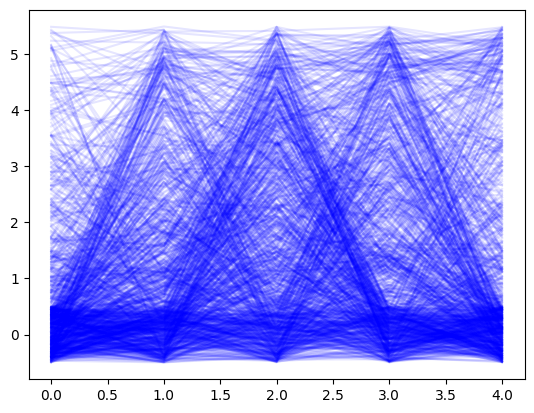

In [32]:

for i in range(1000):
    plt.plot(num_correct_different_dict10[4][:, i]+np.random.uniform(-0.5, 0.5, 5), alpha=0.1, color="blue")

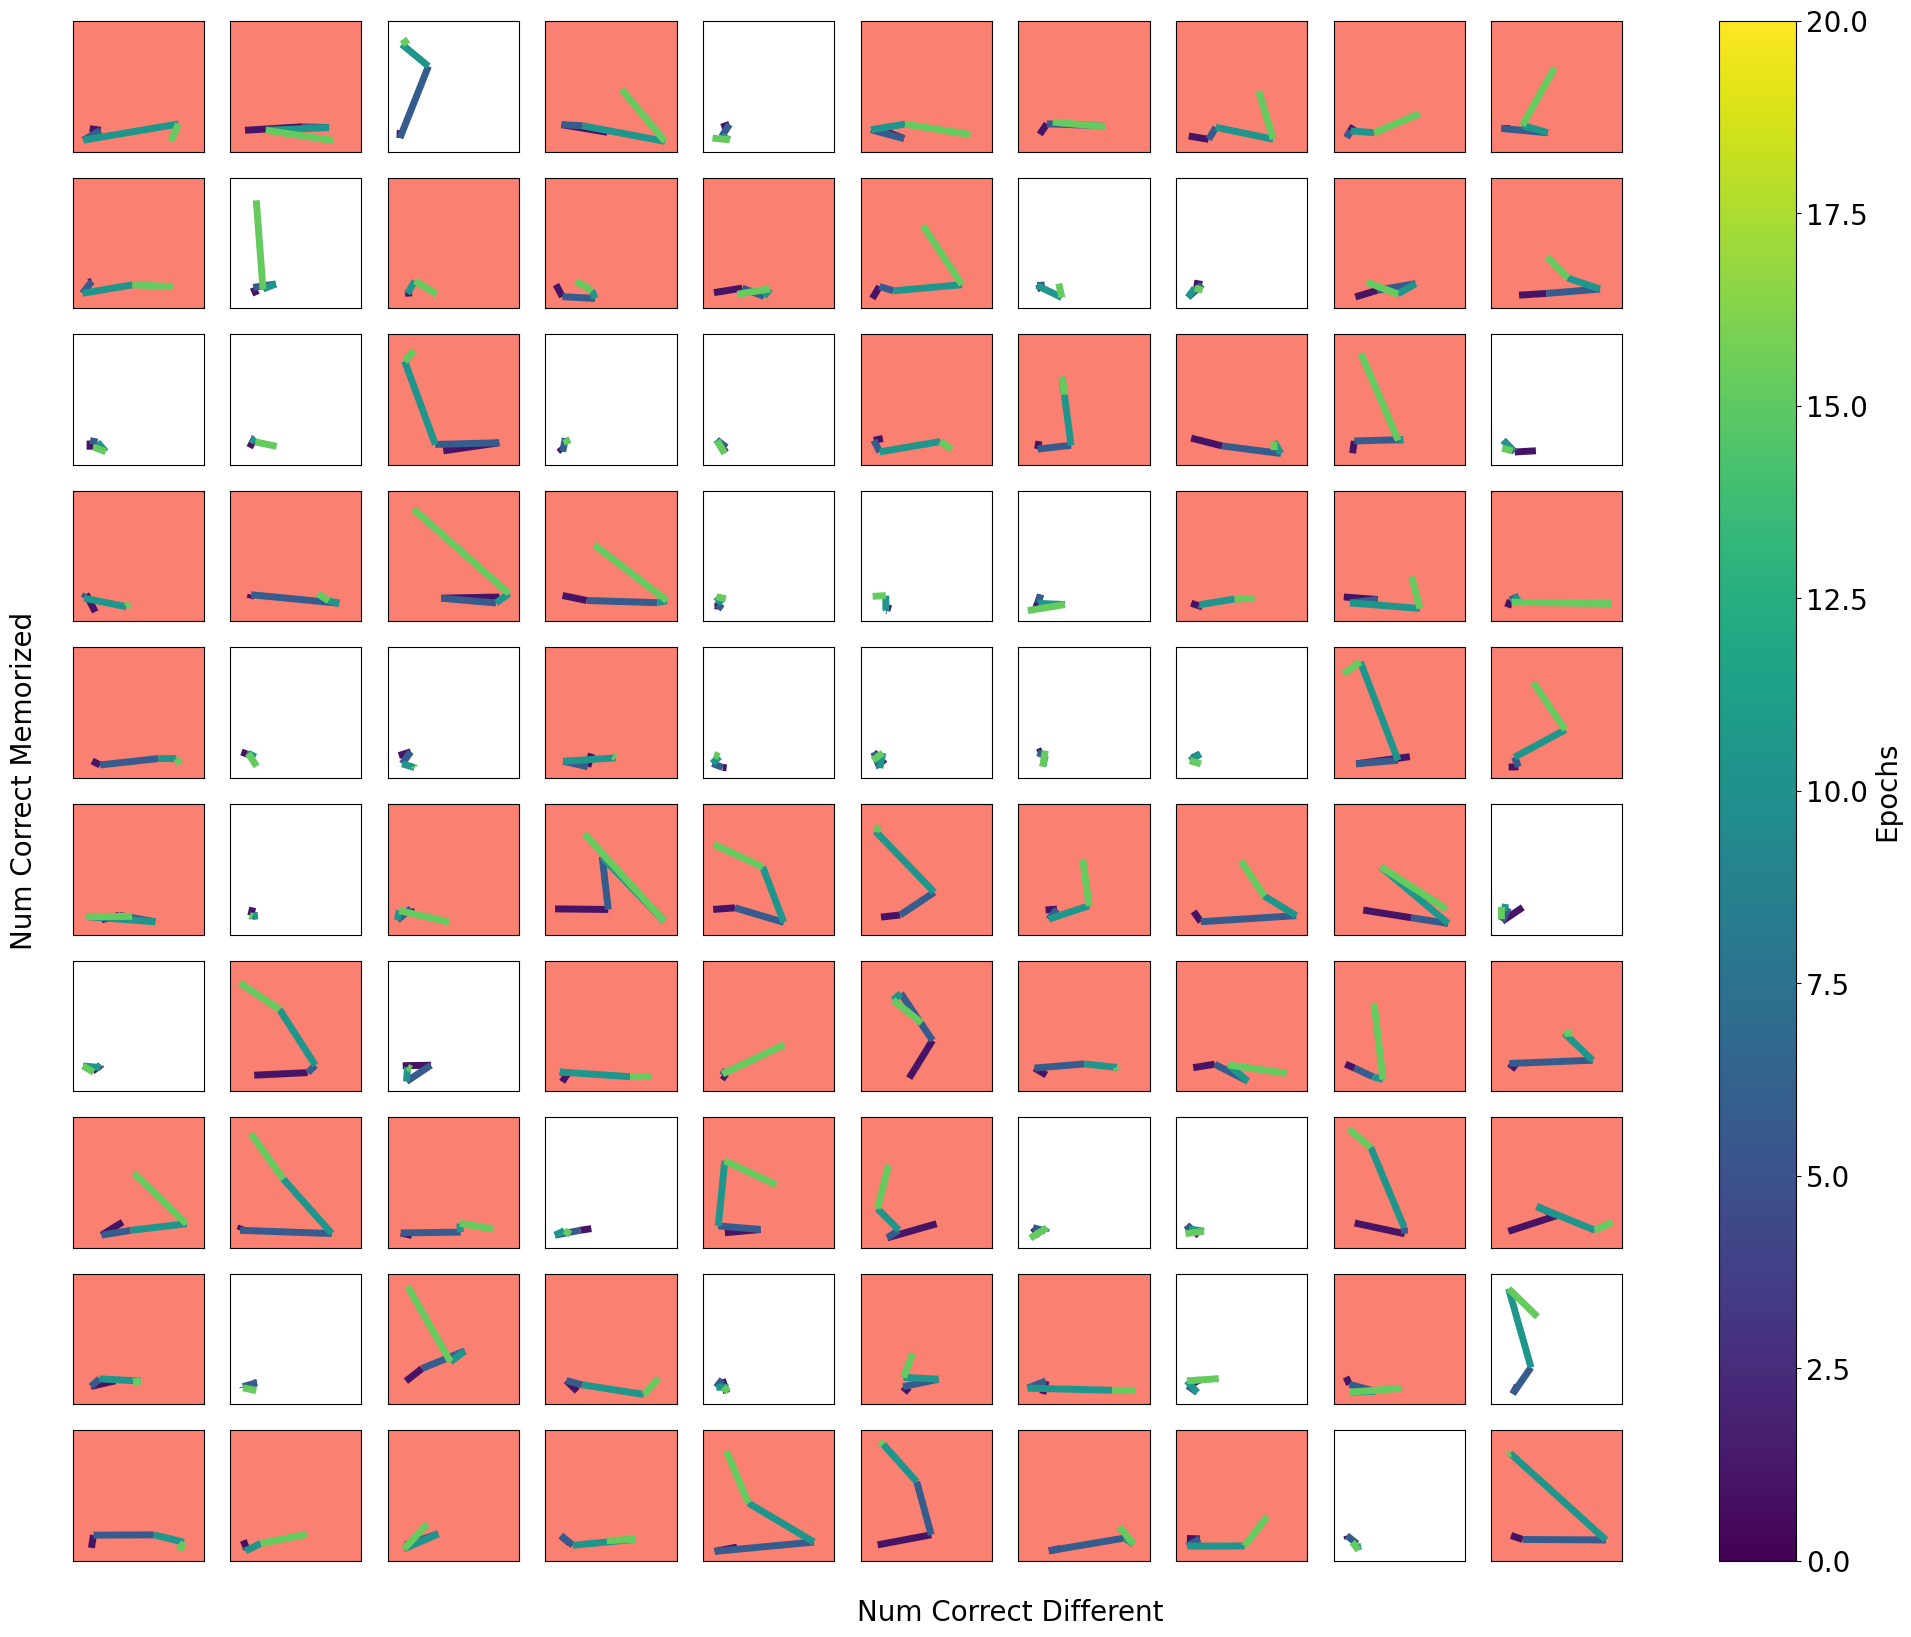

In [25]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

num_ckpts = len(num_memorized_dict5[0])

# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, num_ckpts)


for i in range(100):
    x = num_correct_different_dict5[4][:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    y = num_memorized_dict5[4][:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

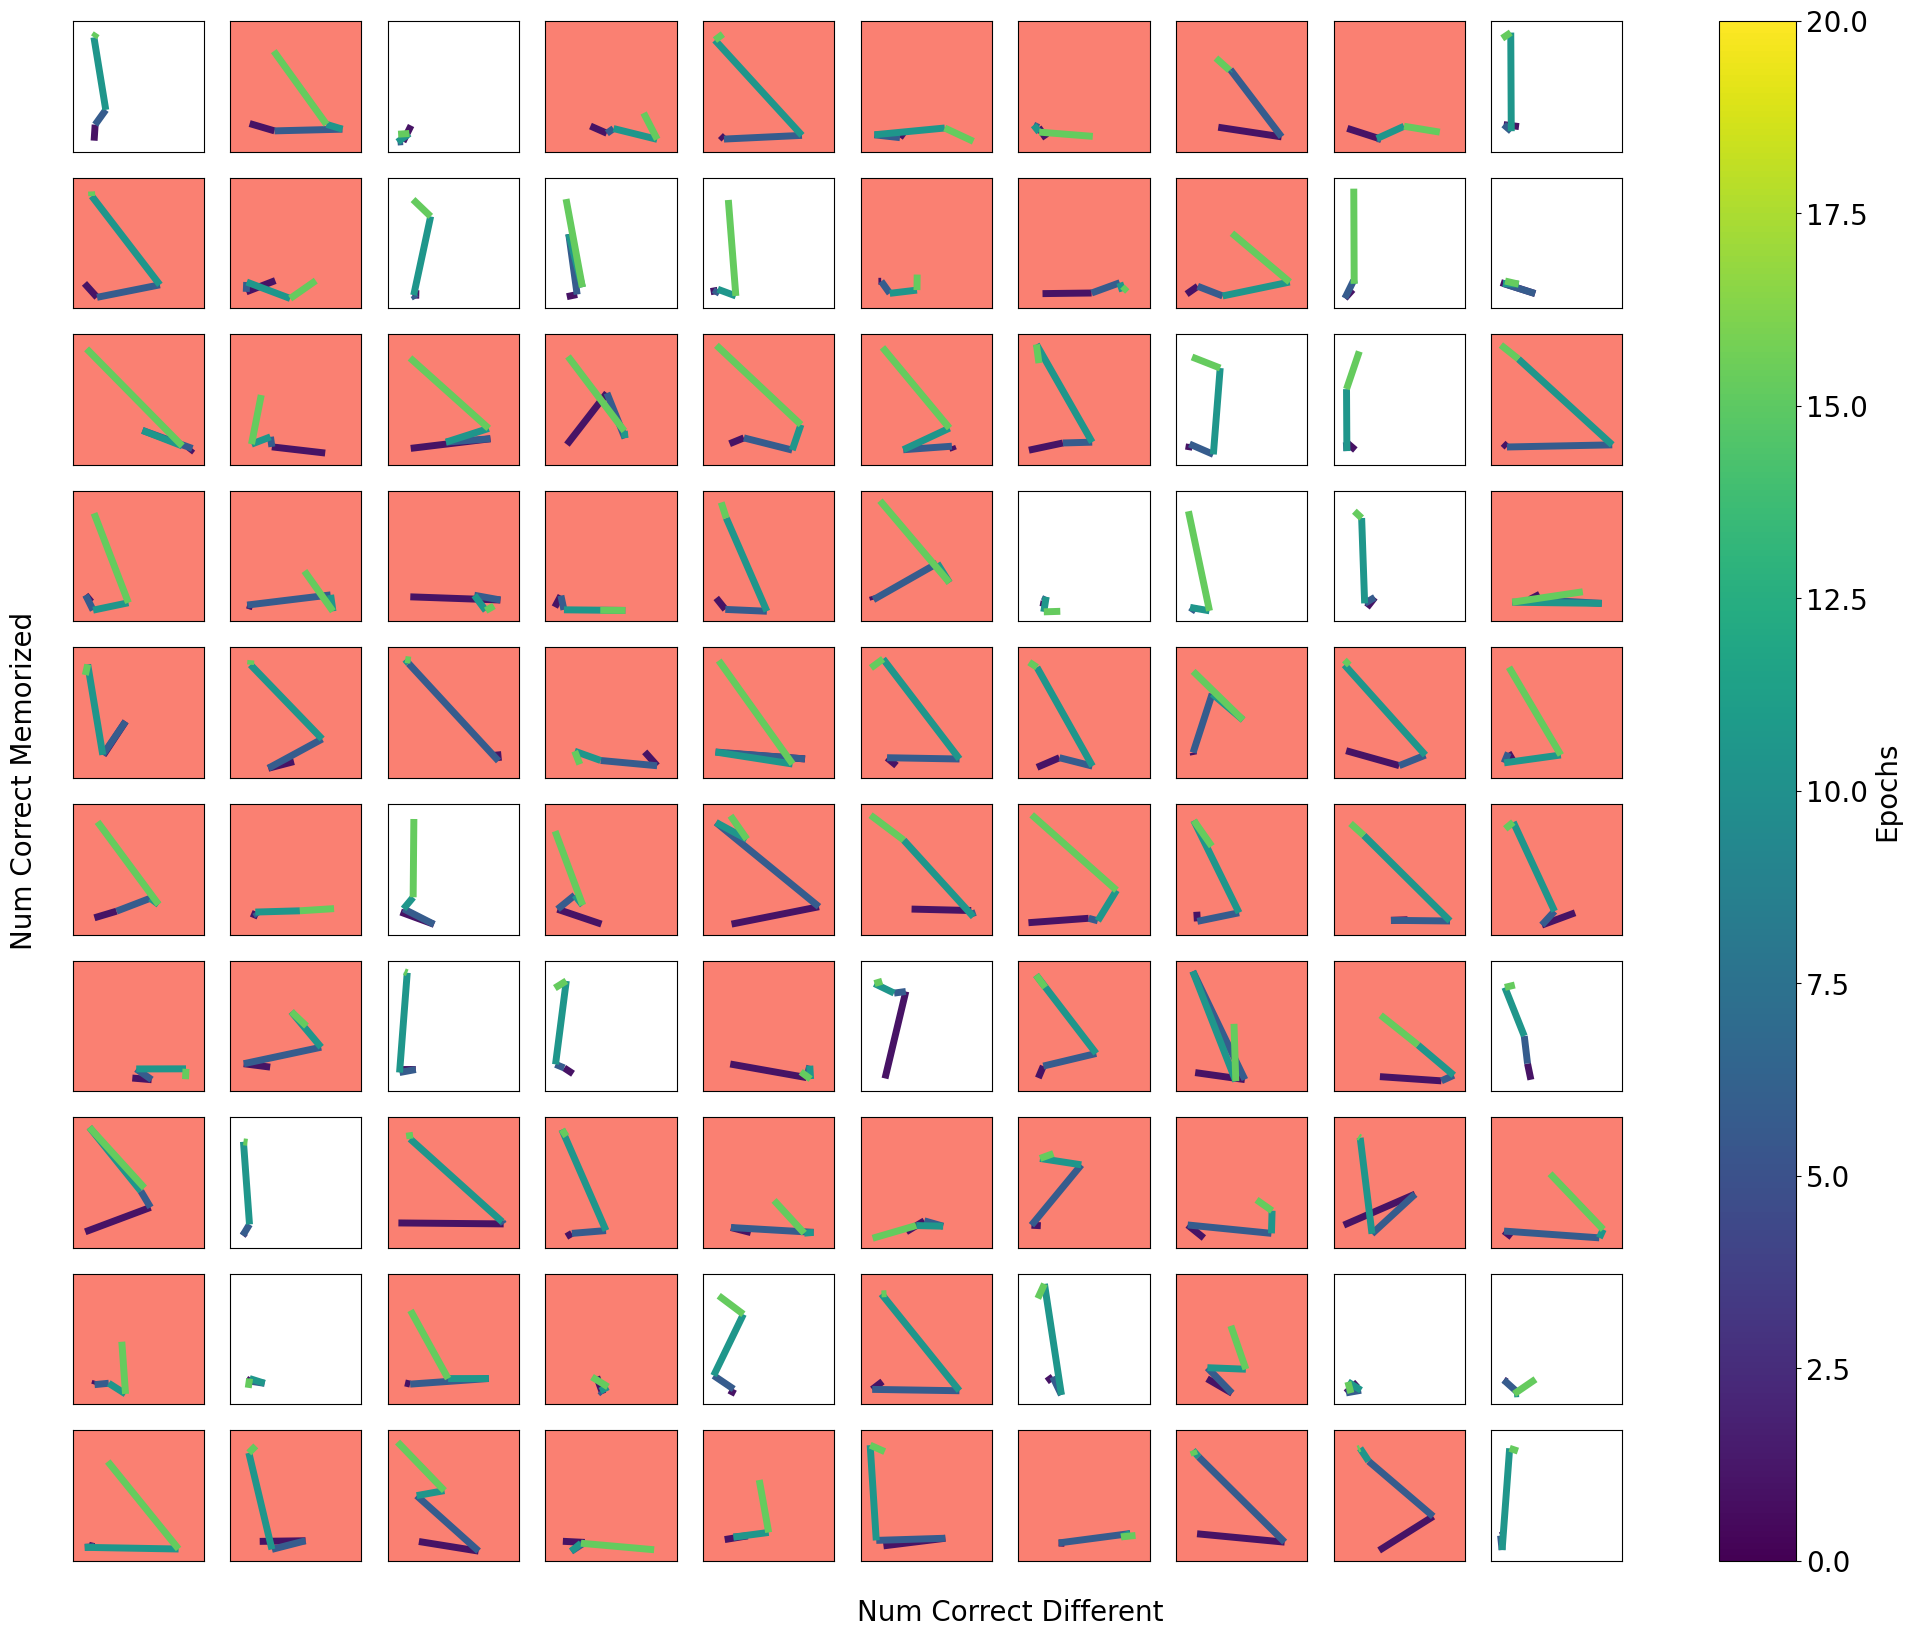

In [26]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

num_ckpts = len(num_memorized_dict5[0])

# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, num_ckpts)




for i in range(100):
    x = num_correct_different_dict10[4][:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    y = num_memorized_dict10[4][:, i]+np.random.uniform(-0.5, 0.5, num_ckpts)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")